In [5]:
# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
import glob as glob

pfun.set_figure()

infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

pvalsBoth = []
pvalsVis = []
pvalsOpto = []
tTypes = ['All','Both', 'onlyOpto', 'onlyVis']

animalID = []
x_coordinate = []
y_coordinate = []
z_coordinate = []
stimuliFamilarity = []

dff_meanBoth  = []
dff_meanVis   = []
dff_meanOpto  = []

savefigpath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'

In [19]:
# BEHAVIOR: Sample animal plot
infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 

animalID = info.recordingList.animalID
stimuliID = info.recordingList.stimuliFamiliarity
# recordingDate = info.recordingList.recordingDate
# recordingDate[indList]
s_animalID = 22101
s_stimuliID = 4 # For training sessions 
indList = np.where((np.array(animalID) == s_animalID) & (np.array(stimuliID) == s_stimuliID ))
indList = indList[0]
#if s_animalID == 22101:
 #    indList = indList[1:]
# elif s_animalID == 22102:
#     indList = indList[:-3]
fRate = 20000

    
# Create behaviour sessions plots
animal_lick  =[]
animal_water =[]
for ind in (indList):
    savepathname = info.recordingList.analysispathname[ind]
    pathname = [f for f in glob.glob(savepathname + 'training-paq-data.pkl')]
    paqData = pd.read_pickle (pathname[0])
    # Get the stim start times 
    trialStartTimes = utils.paq_data (paqData, 'maskerLED', 1, threshold_ttl=True)

    trialStartTimes = trialStartTimes - (2*fRate)

    if len(trialStartTimes)<500:
        licks, trial_licks = utils.lick_binner(savepathname, trialStartTimes,'lickDetection', stimulation = False)
        waterPoints, trial_water = utils.lick_binner(savepathname,trialStartTimes, 'waterDelivery', stimulation = False)

        animal_lick = animal_lick + trial_licks
        animal_water = animal_water + trial_water

fig = plt.figure(1)
for i, array in enumerate(animal_lick):
    plt.plot(array, np.ones_like(array)+i, 'k.',markersize = 2)
    plt.plot(animal_water[i], np.ones_like(animal_water[i])+i+0.3, 'bo',markersize = 2)
                
plt.xlim(0, 8*fRate)
ymax = 150

plt. ylim(0, ymax)
plt.yticks(range(0,ymax, 50), range(ymax,0, -50))
plt.xticks (range(0,(8*fRate)+1,fRate), range(-2,7,1))
plt.ylabel('Trials')
plt.xlabel('Time (sec)')
plt.title(str(s_animalID))
savepathname = 'C:\\Users\\Huriye\Documents\\code\\clapfcstimulation\\figs\\'
pfun.save_figure( 'Figure_22101_stimulation-reward',savepathname)
plt.close(fig)


C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2022-05-09_22107_001\
875


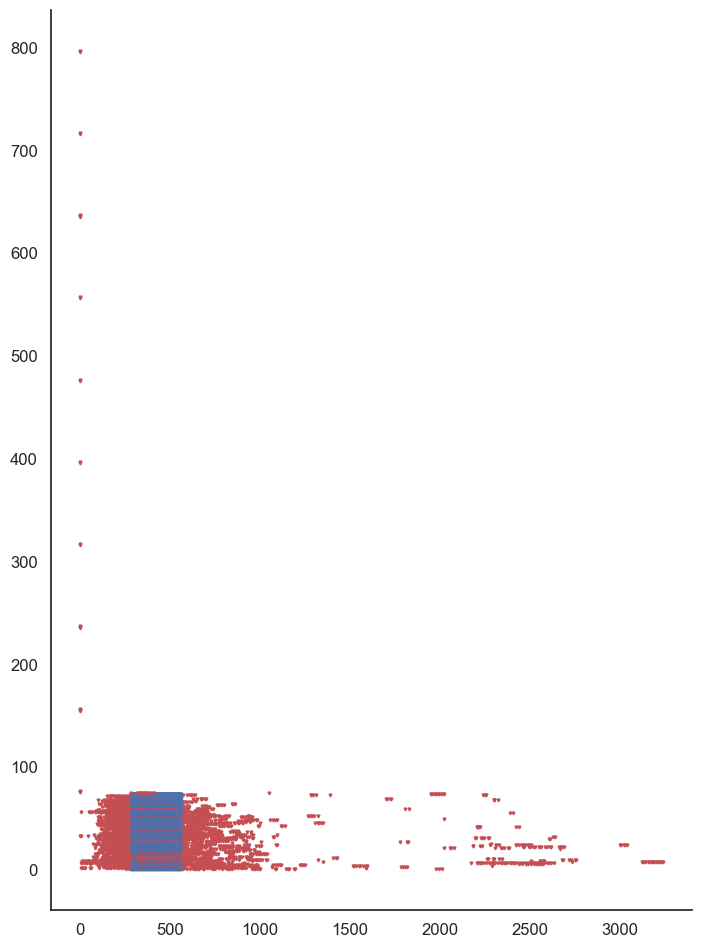

In [2]:
ind = 181
pathname = info.recordingList.analysispathname[ind] 
print(pathname)

paqData = pd.read_pickle (pathname+'paq-data.pkl')
paqRate = paqData['rate']
# Get the stim start times 
trialStartTimes = utils.stim_start_frame (paq=paqData, stim_chan_name='maskerLED',
                                       frame_clock= 'BehOnly', stim_times=None, plane=0, n_planes=1)
    
licks, trial_licks = utils.lick_binner(pathname,trialStartTimes,'lickDetection')
waterPoints, trial_water = utils.lick_binner(pathname,trialStartTimes, 'optoLoopback')
print(len(trial_water))

# plt.plot(trialStartTimes, np.ones_like(trialStartTimes), 'bo',markersize = 2)
# plt.plot(lickTimes, np.ones_like(lickTimes), 'rv',markersize = 2)
# plt.xlim( 0, trialStartTimes[4])

for i, array in enumerate(trial_licks):
    plt.plot(array, np.ones_like(array)+i, 'rv',markersize = 2)
    plt.plot(trial_water[i], np.ones_like(trial_water[i])+i, 'bv',markersize = 2)

90


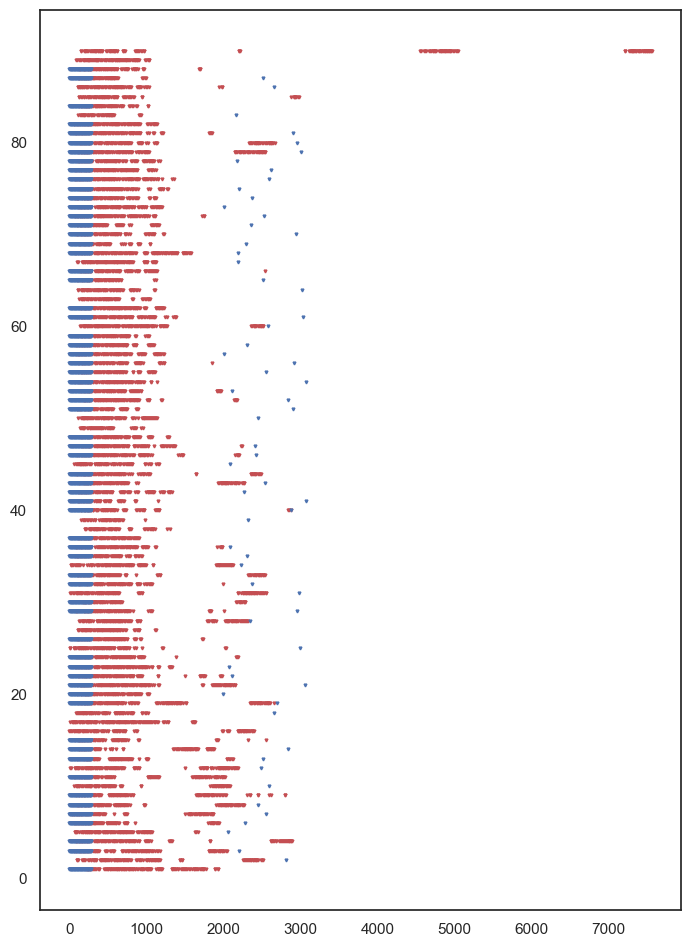

In [4]:
waterPoints, trial_water = utils.lick_binner(pathname,trialStartTimes, 'optoLoopback')
print(len(trial_water))

# plt.plot(trialStartTimes, np.ones_like(trialStartTimes), 'bo',markersize = 2)
# plt.plot(lickTimes, np.ones_like(lickTimes), 'rv',markersize = 2)
# plt.xlim( 0, trialStartTimes[4])

for i, array in enumerate(trial_licks):
    plt.plot(array, np.ones_like(array)+i, 'rv',markersize = 2)
    plt.plot(trial_water[i], np.ones_like(trial_water[i])+i, 'bv',markersize = 2)

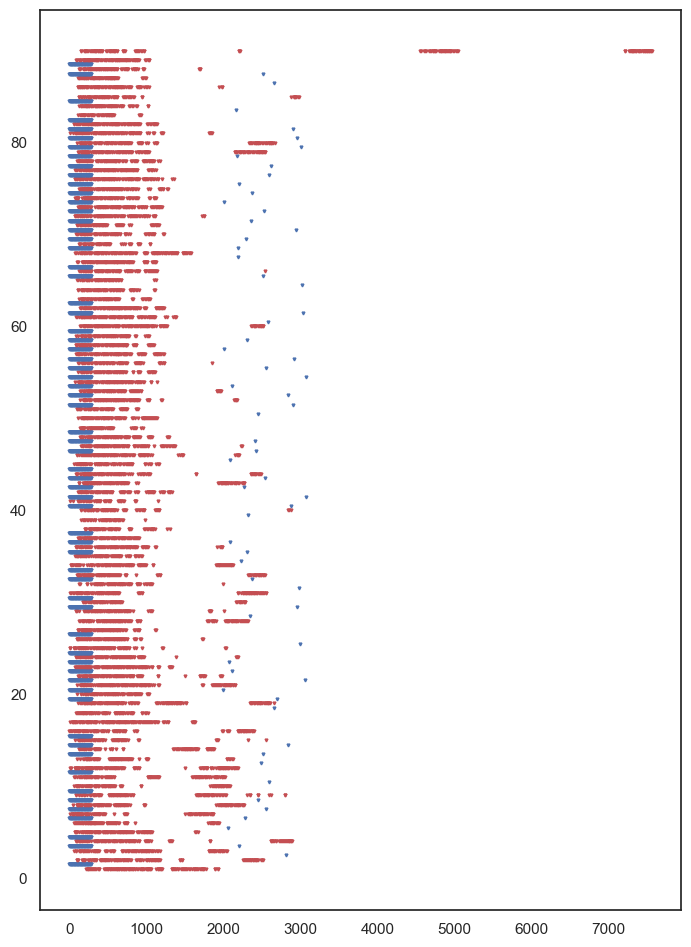

In [6]:

for i, array in enumerate(trial_licks):
    plt.plot(array, np.ones_like(array)+i, 'rv',markersize = 2)
    plt.plot(trial_water[i], np.ones_like(trial_water[i])+i+0.5, 'bv',markersize = 2)

C:\Users\Huriye\Documents\code\clapfcstimulation\analysis\2022-05-09_22104_002\
90
90


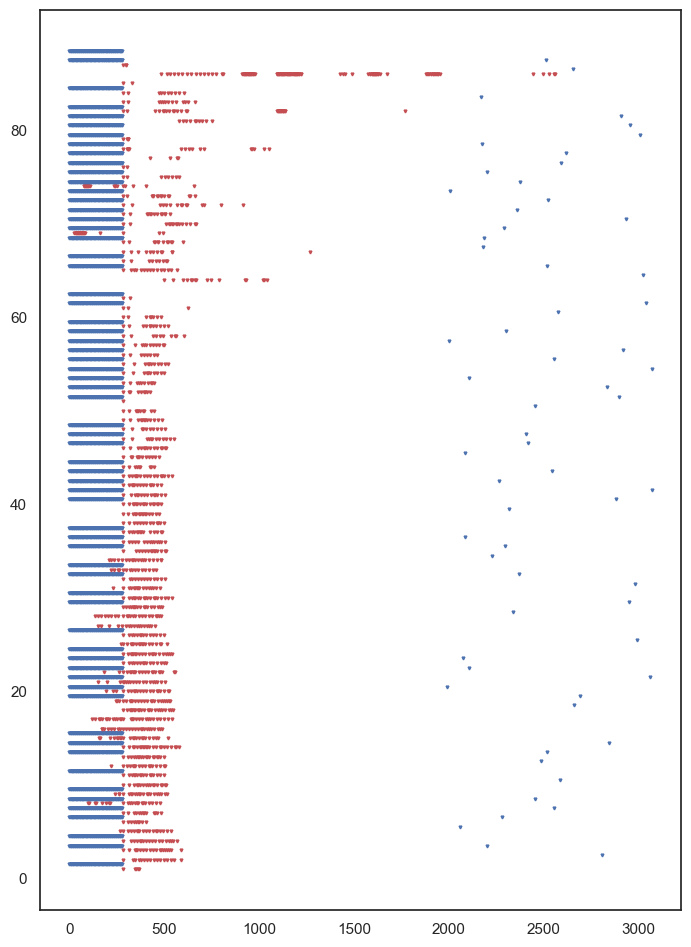

In [10]:
ind = 180
pathname = info.recordingList.analysispathname[ind] 
print(pathname)

paqData = pd.read_pickle (pathname+'paq-data.pkl')
paqRate = paqData['rate']
# Get the stim start times 
trialStartTimes = utils.stim_start_frame (paq=paqData, stim_chan_name='maskerLED',
                                       frame_clock= 'BehOnly', stim_times=None, plane=0, n_planes=1)
    
print(len(trialStartTimes))
licks, trial_licks = utils.lick_binner(pathname,trialStartTimes,'lickDetection')
waterPoints, trial_water = utils.lick_binner(pathname,trialStartTimes, 'optoLoopback')
print(len(trial_water))

# plt.plot(trialStartTimes, np.ones_like(trialStartTimes), 'bo',markersize = 2)
# plt.plot(lickTimes, np.ones_like(lickTimes), 'rv',markersize = 2)
# plt.xlim( 0, trialStartTimes[4])

for i, array in enumerate(trial_licks):
    plt.plot(array, np.ones_like(array)+i, 'rv',markersize = 2)
    plt.plot(trial_water[i], np.ones_like(trial_water[i])+i+0.5, 'bv',markersize = 2)

In [ ]:
# MERGE ALL CELL values: 

for ind, recordingDate in enumerate(info.recordingList.recordingDate):
   print(ind)
   if (info.recordingList.extractedVar[ind] ==1):
      print(ind)
      # load the extracted values
      pathname = info.recordingList.analysispathname[ind] 
      extData = pd.read_pickle (pathname + 'extracted_variables.pkl')

      # Get Dff mean traces
      dff_trace = extData[4]

      if len(dff_trace)>2:

         if ind == 0:
            dff_traceBoth = dff_trace['Both']
            dff_traceVis  = dff_trace['onlyVis']
            if 'onlyOpto' in dff_trace:
               dff_traceOpto = dff_trace['onlyOpto']
            else:
               fakeOpto = np.empty (np.shape(dff_trace['Both']))
               fakeOpto[:] = np.nan

         else:
            dff_traceBoth =  np.vstack ((dff_traceBoth , dff_trace['Both']))
            dff_traceVis  =  np.vstack ((dff_traceVis  , dff_trace['onlyVis']))
            
            if 'onlyOpto' in dff_trace:
               dff_traceOpto =  np.vstack ((dff_traceOpto , dff_trace['onlyOpto']))
            else:
               fakeOpto = np.empty (np.shape(dff_trace['Both']))
               fakeOpto[:] = np.nan
               dff_traceOpto =  np.vstack ((dff_traceOpto ,fakeOpto))
           
            # if 'onlyVis' in dff_trace:
            #    dff_traceVis =  np.vstack ((dff_traceVis , dff_trace['onlyVis']))
            # else:
            #    fakeVis = np.empty (np.shape(dff_trace['Both']))
            #    fakeVis[:] = np.nan
            #    dff_traceVis =  np.vstack ((dff_traceVis ,fakeVis))
               
               # Get p vals for all cells
         pvals = extData[2]
         pvalsBoth += pvals['Both'].tolist()

         if 'onlyOpto' in dff_trace:
            pvalsOpto  += pvals['onlyOpto'].tolist()
         else:
            fakeOpto = np.empty (np.shape(pvals['Both']))
            fakeOpto[:] = np.nan
            pvalsOpto  += fakeOpto.tolist()
            
         # if 'onlyVis' in dff_trace:
         #    pvalsVis  += pvals['onlyVis'].tolist()
         # else:
         #    fakeVis = np.empty (np.shape(pvals['Both']))
         #    fakeVis[:] = np.nan
         #    pvalsVis  += fakeVis.tolist()

         # get dff values
         dff_mean = extData[5] # mean 1500ms 
         dff_meanBoth += dff_mean['Both'].tolist()

         if 'onlyOpto' in dff_trace:
            dff_meanOpto  += dff_mean['onlyOpto'].tolist()
         else:
            fakeOpto = np.empty (np.shape(dff_mean['Both']))
            fakeOpto[:]   = np.nan
            dff_meanOpto += fakeOpto.tolist()
         
         # if 'onlyVis' in dff_trace:
         #    dff_meanVis  += dff_mean['onlyVis'].tolist()
         # else:
         #    fakeVis = np.empty (np.shape(dff_mean['Both']))
         #    fakeVis[:]   = np.nan
         #    dff_meanVis += fakeVis.tolist()

         # get the necessary info about cells 
         x_coordinate += extData[6]
         y_coordinate += extData[7]
         z_coordinate += extData[8]
         animalID     += extData[9]
         stimuliFamilarity += extData[10]

In [ ]:
# LEts do tiny cleaning
ac = np.median(dff_traceBoth[:, 0:59],1)
ac = np.tile(ac,(np.shape(dff_traceBoth)[1],1)).transpose()
dff_traceBoth = dff_traceBoth -ac

ac = np.median(dff_traceVis[:, 0:59],1)
ac = np.tile(ac,(np.shape(dff_traceVis)[1],1)).transpose()
dff_traceVis = dff_traceVis -ac

ac = np.median(dff_traceOpto[:, 0:59],1)
ac = np.tile(ac,(np.shape(dff_traceOpto)[1],1)).transpose()
dff_traceOpto = dff_traceOpto -ac

In [ ]:
dff_meanBoth = np.mean(dff_traceBoth[:, 70:105] ,axis=1)
dff_meanVis  = np.mean(dff_traceVis[:, 70:105],axis=1)
dff_meanOpto = np.mean(dff_traceOpto [:, 70:105],axis=1)

In [ ]:
# Get the correct index -recordings first

# CamKII analysis only

CamKII_animals = [21104, 21107, 21108, 21109,22101,22102,22103,22104,22105,22106,22107,22108 ]
NAAP_animals   = [21101, 21102, 21103, 21105, 21106]  

# exclude inhibitory animals
s = set(CamKII_animals)
selectedAnimals = [i in s for i in animalID]

# exclude trained stimuli
exclude =[0] 
s = set(exclude)
selectedFamilarity = [i in s for i in stimuliFamilarity]

# exclude non responsive units
responsiveVis = (np.array(pvalsVis) < 0.001)
responsiveBoth = (np.array(pvalsBoth) < 0.001)
responsiveOpto = (np.array(pvalsOpto) < 0.001)
responsiveNoVis = (np.array(pvalsVis) > 0.05)

excita = (np.array(dff_meanVis) > 0)
inhibi = (np.array(dff_meanVis) < 0)


responsiveNoVis = np.logical_and(responsiveBoth, responsiveNoVis)
#bothRes = np.logical_and(bothRes, responsiveBoth)
print(np.sum(responsiveVis))
# gives the total number of cells 
indexAn = np.logical_and(selectedAnimals,selectedFamilarity) #38300
print(np.sum(indexAn))
index = np.logical_and(indexAn, responsiveVis)
print('Total: ' + str(np.sum(index)))
# indexE = np.logical_and(index, excita)
# print(np.sum(indexE))
# indexI = np.logical_and(index, inhibi)
# print(np.sum(indexI))


In [ ]:
# Anatomical Distribution  
index = np.logical_and(indexAn, responsiveBoth)
data_x =pd.DataFrame(list(compress(x_coordinate, index)))
data_y =pd.DataFrame(list(compress(y_coordinate, index)))
plt.scatter(data_x, data_y, marker= 'x')

index = np.logical_and(indexAn, responsiveVis)
data_x =pd.DataFrame(list(compress(x_coordinate, index)))
data_y =pd.DataFrame(list(compress(y_coordinate, index)))
plt.scatter(data_x, data_y, alpha = 0.5, marker= 'x' )

index = np.logical_and(indexAn, responsiveOpto)
data_x =pd.DataFrame(list(compress(x_coordinate, index)))
data_y =pd.DataFrame(list(compress(y_coordinate, index)))
plt.scatter(data_x, data_y, alpha = 0.5, marker= 'x' )

index = np.logical_and(indexAn, bothRes)
data_x =pd.DataFrame(list(compress(x_coordinate, index)))
data_y =pd.DataFrame(list(compress(y_coordinate, index)))
plt.scatter(data_x, data_y, alpha = 0.4, marker= 'x' , c = 'red', linewidths = 1)

pfun.save_figure( 'map-camk2-red -22106',savefigpath)

In [ ]:
# Average plots
index = np.logical_and(indexAn, responsiveVis)
excita = (np.array(dff_meanOpto) > 0)
inhibi = (np.array(dff_meanOpto) < 0)
index = np.logical_and(index, excita)

data_x =pd.DataFrame(dff_traceVis[index,:].transpose())
pfun.lineplot_withSEM (data_x, 1, 'onlyVis')

data_x =pd.DataFrame(dff_traceBoth[index,:].transpose())
pfun.lineplot_withSEM (data_x, 3, 'Both')
#plt.plot(np.mean(data_x, axis=1), color='black')

data_x =pd.DataFrame(dff_traceOpto[index,:].transpose())
pfun.lineplot_withSEM (data_x, 2, 'onlyOpto')

plt.ylim(-0.3,1)
pfun.save_figure( 'TRAINED: dff-mean-responsiveVis-inhibi',savefigpath)

In [ ]:
# Average plots
index = np.logical_and(indexAn, responsiveBoth)
data_x =pd.DataFrame(dff_traceBoth[index,:].transpose())
plt.plot(np.mean(data_x, axis=1), color='black')
data_x =pd.DataFrame(dff_traceVis[index,:].transpose())
plt.plot(np.mean(data_x, axis=1), color='red')
data_x =pd.DataFrame(dff_traceOpto[index,:].transpose())
plt.plot(np.mean(data_x, axis=1), color='blue')

plt.ylim(-0.1,0.3)
pfun.save_figure( 'dff-mean-responsiveBoth',savefigpath)

In [ ]:
#plot_data = stats.zscore(data[index])
#plt.subplot(1,2,1)
# Average plots
index = np.logical_and(indexAn, responsiveVis)
sortedInd = np.array(dff_meanVis[index]).argsort()

plot_data = dff_traceVis[index]
plot_data = plot_data[sortedInd]
sns.heatmap(plot_data, vmin = -2, vmax = 2)
pfun.save_figure( 'TRANED: heat-map-responsiveVis-Vis',savefigpath)


#plt.subplot(1,2,2)
plot_data = dff_traceBoth[index]
plot_data = plot_data[sortedInd]
sns.heatmap(plot_data, vmin = -2, vmax = 2)

pfun.save_figure( 'TRAINED: heat-map-responsiveVis-Both',savefigpath)


In [ ]:
#plot_data = stats.zscore(data[index])

# Average plots
index = np.logical_and(indexAn, responsiveNoVis)
sortedInd = np.array(dff_meanOpto[index]).argsort()

#plt.subplot(1,2,1)
plot_data = dff_traceOpto[index]
plot_data = plot_data[sortedInd]
sns.heatmap(plot_data, vmin = -2, vmax = 2)
pfun.save_figure( 'heat-map-responsiveNoVis-Opto',savefigpath)

#plt.subplot(1,3,2)
plot_data = dff_traceBoth[index]
plot_data = plot_data[sortedInd]
sns.heatmap(plot_data, vmin = -2, vmax = 2)
pfun.save_figure( 'heat-map-responsiveNoVis-Both',savefigpath)

#plt.subplot(1,3,3)
plot_data = dff_traceVis[index]
plot_data = plot_data[sortedInd]
sns.heatmap(plot_data, vmin = -2, vmax = 2)
pfun.save_figure( 'heat-map-responsiveNoVis-Vis',savefigpath)


In [ ]:
index = np.logical_and(indexAn, responsiveVis)
dx = {'Both': list(compress(dff_meanBoth, index)),
       'Vis': list(compress(dff_meanVis, index)),
     # 'dff_both': list(compress(dff_meanBoth, index)),
      }
data =pd.DataFrame(dx)
fig, ax = plt.subplots()
sns.histplot(data, ax = ax,)

ax.set_xlim (-1.5, 1.5)
pfun.save_figure( 'TRAINED: histogram-magnitude-responsiveVis',savefigpath)
